# <h1><font color='red'>Capstone Project - Lending Club

<h3><font color='green'>Introduction</font><br></h3>

"LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform."   

<h3><font color='maroon'><b>Problem Statement:</b></font></h3><br>Goal is to try find a better prediction model to prevent investing on '"bad loans".

# **Loading the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore any warnings
import warnings 
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the data and creating a dataframe**

In [ ]:
 # Importing accepted dataset in csv format as the data received is in .txt format and then converted to excel.
df = pd.read_csv(r'/content/drive/MyDrive/Project folder/accepted_2007_to_2018Q4.csv',encoding = "ISO-8859-1", low_memory=False)


# **Data Description**

In [ ]:
# Checking the number of observations and number of variables in the dataset
df.shape

(2260701, 151)

In [ ]:
# we want to increase it, because in this case there are a lot of column names
pd.options.display.max_rows = 1000

In [ ]:
# Viewing the top 5 rows of the dataset of accepted
# the .T is transposing the matrix.
df.head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600,24700,20000,35000,10400
funded_amnt,3600,24700,20000,35000,10400
funded_amnt_inv,3600,24700,20000,35000,10400
term,36 months,36 months,60 months,60 months,60 months
int_rate,13.99,11.99,10.78,14.85,22.45
installment,123.03,820.28,432.66,829.9,289.91
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1


In [ ]:
# Viewing the last 5 rows of the dataset of accepted
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,MORTGAGE,227000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,907xx,CA,12.75,7.0,Feb-1995,705.0,709.0,1.0,9.0,NaN,5.0,0.0,8633.0,64.9,37.0,f,23252.59,23252.59,...,55970.0,28398.0,12300.0,42670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,110000.0,Not Verified,Oct-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,334xx,FL,18.30,0.0,Jul-1999,660.0,664.0,0.0,67.0,72.0,10.0,1.0,17641.0,68.1,31.0,f,0.00,0.00,...,84664.0,62426.0,20700.0,58764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,10+ years,MORTGAGE,95000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,770xx,TX,23.36,0.0,Jun-1996,660.0,664.0,1.0,37.0,NaN,8.0,0.0,7662.0,54.0,22.0,w,8456.12,8456.12,...,163804.0,44215.0,9500.0,34169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking the data types of variables
# It will also help us to find the number of non-null (not missing) data points for each column
# because this dataframe is so large, we have to force it to show the datatypes and non-null numbers with the arguments
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          2260701 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   2260668 non-null  float64
 3   funded_amnt                                 2260668 non-null  float64
 4   funded_amnt_inv                             2260668 non-null  float64
 5   term                                        2260668 non-null  object 
 6   int_rate                                    2260668 non-null  float64
 7   installment                                 2260668 non-null  float64
 8   grade                                       2260668 non-null  object 
 9   sub_grade                                   2260668 non-

In [ ]:
#Summary statistics
# Which will also help us to find the outliers
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,...,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,...,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,3.361728e+04,669.755603,673.755631,0.633256,1.538997,11.469455,58.169101,3.010554,12.533072,0.046352,0.077568,36.937928,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,3.301124e+01,8.859632e-01,2.190047e+01,26.464094,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.343239e+03,7.342333e+03,9.901383e+03,9.896992e+03,8.321852e+03,2.679738e+03,1.184159e+01,7.481640e+02,1.312256e+02,6.018248e+03,7.297044e+01,1.110976e+02,1.508131e-01,21.533121,0.0,7.416135e+04,7.822086,6.961656e-02,8.518462e+03,1.606926e+05,1.140700e+00,...,4.701430e+00,7.359114e+00,4.683928e+00,8.038868e+00,3.293434e+00,5.644027e+00,2.710643e-02,5.616522e-02,4.935732e-01,1.830711e+00,9.036140e+0

# Creating target variable/ Data Cleaning

In [ ]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [ ]:
# Taking only important loans status:
#.isin() is a trick for checking if something is in a list
df = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off','Late (31-120 days)','In Grace Period',                                          
                                    'Late (16-30 days)','Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off', 'Default',])]

In [ ]:
# reseting the index
df.reset_index(drop=True,inplace=True)

In [ ]:
# Combining all values except current to default column.
df['loan_status'] = df['loan_status'].replace({'Charged Off':'Default','Late (31-120 days)':'Default','In Grace Period':'Default',                                         
                                    'Late (16-30 days)':'Default','Does not meet the credit policy. Status:Fully Paid':'Default','Does not meet the credit policy. Status:Charged Off':'Default'})
df['loan_status'].value_counts()

Fully Paid    1076751
Default        305600
Name: loan_status, dtype: int64

In [ ]:
# Loan status has too many unique values so instead we are creating a new var taking the default as 1 and rest 0.
target = [1 if i=='Default' else 0 for i in df['loan_status']]
df['target'] = target
df['target'].value_counts()

0    1076751
1     305600
Name: target, dtype: int64

***our target feature is not balanced***

***Changing the date string to date object***

In [ ]:
df['issue_d']= pd.to_datetime(df['issue_d'],errors='coerce')
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'],errors='coerce')

**In order to create fico score a new variable we need to add fico score hing and low divided by 2.**

In [ ]:
# creating a new column fico_score
df['fico_score']=round((df['fico_range_high']+df['fico_range_low'])/2,2)

***Creating new column total income for joint account holder.***

In [ ]:
# creating new column total_annual_inc
df['total_annual_inc']=df['annual_inc']+df['annual_inc_joint']

In [ ]:
# creating a new column dti joint
df['dti_jnt']=round((df['dti']+df['dti_joint'])/2,2)

In [ ]:
# credit_ratio column
df['credit_ratio']=round(df['open_acc']/df['total_acc'],3)

# installment_ratio
df['installment_ratio']=round(df['installment']/df['loan_amnt'],3)

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,target,fico_score,total_annual_inc,dti_jnt,credit_ratio,installment_ratio
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,2003-08-01,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,677.0,NaN,NaN,0.538,0.034
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,1999-12-01,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,717.0,NaN,NaN,0.579,0.033
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,2000-08-01,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,697.0,134000.0,12.32,0.333,0.022
3,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,1998-06-01,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,697.0,NaN,NaN,0.343,0.028
4,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,300xx,GA,10.20,0.0,1987-10-01,690.0,694.0,0.0,NaN,NaN,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,692.0,NaN,NaN,0.833,0.034


# **Taking only those variables which is important for the modelling.**

In [ ]:
Features_ind=['annual_inc','dti','fico_score','home_ownership','installment','int_rate','loan_amnt','earliest_cr_line','issue_d','grade','sub_grade',
                                     'mort_acc','term','verification_status','zip_code','open_acc','total_acc','revol_util','credit_ratio','installment_ratio','target']

Features_jnt=['total_annual_inc','fico_score','home_ownership','installment','int_rate','loan_amnt','earliest_cr_line','issue_d','grade','sub_grade',  
                                     'dti_jnt','mort_acc','term','verification_status_joint','zip_code','open_acc','total_acc','revol_util','credit_ratio','installment_ratio','target']

In [ ]:
df.application_type.value_counts()

Individual    1352767
Joint App       29584
Name: application_type, dtype: int64

***Separating the main dataframe to indivodual acc and Joint acc.***

In [ ]:
# Creating new dffor individual account type based on important features.

ind_df=df[df['application_type']=='Individual']
ind_df=ind_df[Features_ind]

print('Shape of individual dataframe',ind_df.shape,end='\n\n')

# reseting the index of individual dataframe

ind_df.reset_index(drop=True,inplace=True)

Shape of individual dataframe (1352767, 21)



In [ ]:
ind_df.head(5)

,annual_inc,dti,fico_score,home_ownership,installment,int_rate,loan_amnt,earliest_cr_line,issue_d,grade,sub_grade,mort_acc,term,verification_status,zip_code,open_acc,total_acc,revol_util,credit_ratio,installment_ratio,target
0,55000.0,5.91,677.0,MORTGAGE,123.03,13.99,3600.0,2003-08-01,2015-12-01,C,C4,1.0,36 months,Not Verified,190xx,7.0,13.0,29.7,0.538,0.034,0
1,65000.0,16.06,717.0,MORTGAGE,820.28,11.99,24700.0,1999-12-01,2015-12-01,C,C1,4.0,36 months,Not Verified,577xx,22.0,38.0,19.2,0.579,0.033,0
2,104433.0,25.37,697.0,MORTGAGE,289.91,22.45,10400.0,1998-06-01,2015-12-01,F,F1,6.0,60 months,Source Verified,174xx,12.0,35.0,64.5,0.343,0.028,0
3,34000.0,10.20,692.0,RENT,405.18,13.44,11950.0,1987-10-01,2015-12-01,C,C3,0.0,36 months,Source Verified,300xx,5.0,6.0,68.4,0.833,0.034,0
4,180000.0,14.67,682.0,MORTGAGE,637.58,9.17,20000.0,1990-06-01,2015-12-01,B,B2,4.0,36 months,Not Verified,550xx,12.0,27.0,84.5,0.444,0.032,0


In [ ]:
# creating new df for joint account type based on important features.
jnt_df=df[df['application_type']=='Joint App']
jnt_df=jnt_df[Features_jnt]

print('Shape of Joint dataframe',jnt_df.shape,end='\n\n')

# reseting the index of joint dataframe

jnt_df.reset_index(drop=True,inplace=True)

Shape of Joint dataframe (29584, 21)



In [ ]:
jnt_df.head(5)

,total_annual_inc,fico_score,home_ownership,installment,int_rate,loan_amnt,earliest_cr_line,issue_d,grade,sub_grade,dti_jnt,mort_acc,term,verification_status_joint,zip_code,open_acc,total_acc,revol_util,credit_ratio,installment_ratio,target
0,134000.00,697.0,MORTGAGE,432.66,10.78,20000.0,2000-08-01,2015-12-01,B,B4,12.32,5.0,60 months,Not Verified,605xx,6.0,18.0,56.2,0.333,0.022,0
1,142000.00,667.0,MORTGAGE,498.15,11.99,15000.0,2004-08-01,2015-12-01,C,C1,16.48,1.0,36 months,Not Verified,919xx,9.0,16.0,88.3,0.562,0.033,0
2,156749.00,682.0,MORTGAGE,678.37,23.13,24000.0,1998-07-01,2015-12-01,F,F2,30.57,1.0,60 months,Not Verified,773xx,13.0,22.0,73.1,0.591,0.028,0
3,213000.00,677.0,MORTGAGE,551.50,13.44,24000.0,2001-06-01,2015-12-01,C,C3,22.73,2.0,60 months,Not Verified,646xx,13.0,24.0,53.3,0.542,0.023,0
4,123872.64,682.0,RENT,320.70,18.99,8750.0,1998-08-01,2015-12-01,E,E1,31.89,0.0,36 months,Not Verified,606xx,9.0,12.0,96.5,0.750,0.037,1


# Handling the null and missing values of the dataframes.

In [ ]:
# Replacing the missing values in the data which is present as an underline.
ind_df=ind_df.replace('_', np.nan)
jnt_df=jnt_df.replace('_', np.nan)

In [ ]:
#Lets handle the missing values for the individual acc type.

In [ ]:
ind_df.isnull().sum()

annual_inc                 4
dti                        0
fico_score                 0
home_ownership             0
installment                0
int_rate                   0
loan_amnt                  0
earliest_cr_line          29
issue_d                    0
grade                      0
sub_grade                  0
mort_acc               50030
term                       0
verification_status        0
zip_code                   1
open_acc                  29
total_acc                 29
revol_util               880
credit_ratio              29
installment_ratio          0
target                     0
dtype: int64

In [ ]:
# Separating the Numerical/Date-Time variables and the Categorical variables for individual dataset.
num_vars = ind_df.columns[ind_df.dtypes != 'object']
cat_vars = ind_df.columns[ind_df.dtypes == 'object']

print(num_vars)
print()
print(cat_vars)

Index(['annual_inc', 'dti', 'fico_score', 'installment', 'int_rate',
       'loan_amnt', 'earliest_cr_line', 'issue_d', 'mort_acc', 'open_acc',
       'total_acc', 'revol_util', 'credit_ratio', 'installment_ratio',
       'target'],
      dtype='object')

Index(['home_ownership', 'grade', 'sub_grade', 'term', 'verification_status',
       'zip_code'],
      dtype='object')


In [ ]:
# Replacing the missing values with mean for numerical variables for individual data.
for value in ['revol_util', 'mort_acc','annual_inc','open_acc','total_acc','credit_ratio']:
    ind_df[value].fillna(round(ind_df[value].mean(),0),inplace=True)

In [ ]:
# Replacing the missing values with mode for categorical variables for individual data.
for value in ['zip_code','earliest_cr_line']:
   ind_df[value].fillna(ind_df[value].mode()[0],inplace=True)

In [ ]:
ind_df.isnull().sum()

annual_inc             0
dti                    0
fico_score             0
home_ownership         0
installment            0
int_rate               0
loan_amnt              0
earliest_cr_line       0
issue_d                0
grade                  0
sub_grade              0
mort_acc               0
term                   0
verification_status    0
zip_code               0
open_acc               0
total_acc              0
revol_util             0
credit_ratio           0
installment_ratio      0
target                 0
dtype: int64

***Creating a new col credit history***

In [ ]:
# credit_history column

ind_df['credit_history']=ind_df.issue_d-ind_df.earliest_cr_line


**Handling missing values for joint acc type**

In [ ]:
jnt_df.isnull().sum()

total_annual_inc               0
fico_score                     0
home_ownership                 0
installment                    0
int_rate                       0
loan_amnt                      0
earliest_cr_line               0
issue_d                        0
grade                          0
sub_grade                      0
dti_jnt                      415
mort_acc                       0
term                           0
verification_status_joint    256
zip_code                       0
open_acc                       0
total_acc                      0
revol_util                    55
credit_ratio                   0
installment_ratio              0
target                         0
dtype: int64

In [ ]:
# Replacing the missing values with mean for numerical variables for jnt data.
for value in ['dti_jnt', 'revol_util']:
    jnt_df[value].fillna(round(jnt_df[value].mean(),0),inplace=True)

In [ ]:
# Replacing the missing values with mode for categorical variables for jnt data.
for value in ['verification_status_joint']:
   jnt_df[value].fillna(jnt_df[value].mode()[0],inplace=True)

**Creating a new col credit history which is the difference between issue_d and earliest_cr_line.**

In [ ]:
# credit_history column

jnt_df['credit_history']=jnt_df.issue_d-jnt_df.earliest_cr_line


In [ ]:
jnt_df.isnull().sum()

total_annual_inc             0
fico_score                   0
home_ownership               0
installment                  0
int_rate                     0
loan_amnt                    0
earliest_cr_line             0
issue_d                      0
grade                        0
sub_grade                    0
dti_jnt                      0
mort_acc                     0
term                         0
verification_status_joint    0
zip_code                     0
open_acc                     0
total_acc                    0
revol_util                   0
credit_ratio                 0
installment_ratio            0
target                       0
credit_history               0
dtype: int64

 ***All null values are handled successfully in  individual and joint dataframe***

## Handling Skewness in dataframe

In [ ]:
# checking for outlier tendency
ind_df.kurtosis(axis=0).sort_values(ascending=False)

annual_inc           4825.617098
mort_acc                5.512899
open_acc                3.358042
fico_score              1.684800
total_acc               1.678005
installment             0.756935
int_rate                0.489858
revol_util              0.243249
installment_ratio       0.129324
loan_amnt              -0.077001
credit_ratio           -0.082144
target                 -0.142210
dti                    -0.500895
dtype: float64

In [ ]:
# Separating the Numerical column from accepted dataset.
num_vars = list(ind_df.columns[ind_df.dtypes == 'float64'])

print(len(num_vars))

12


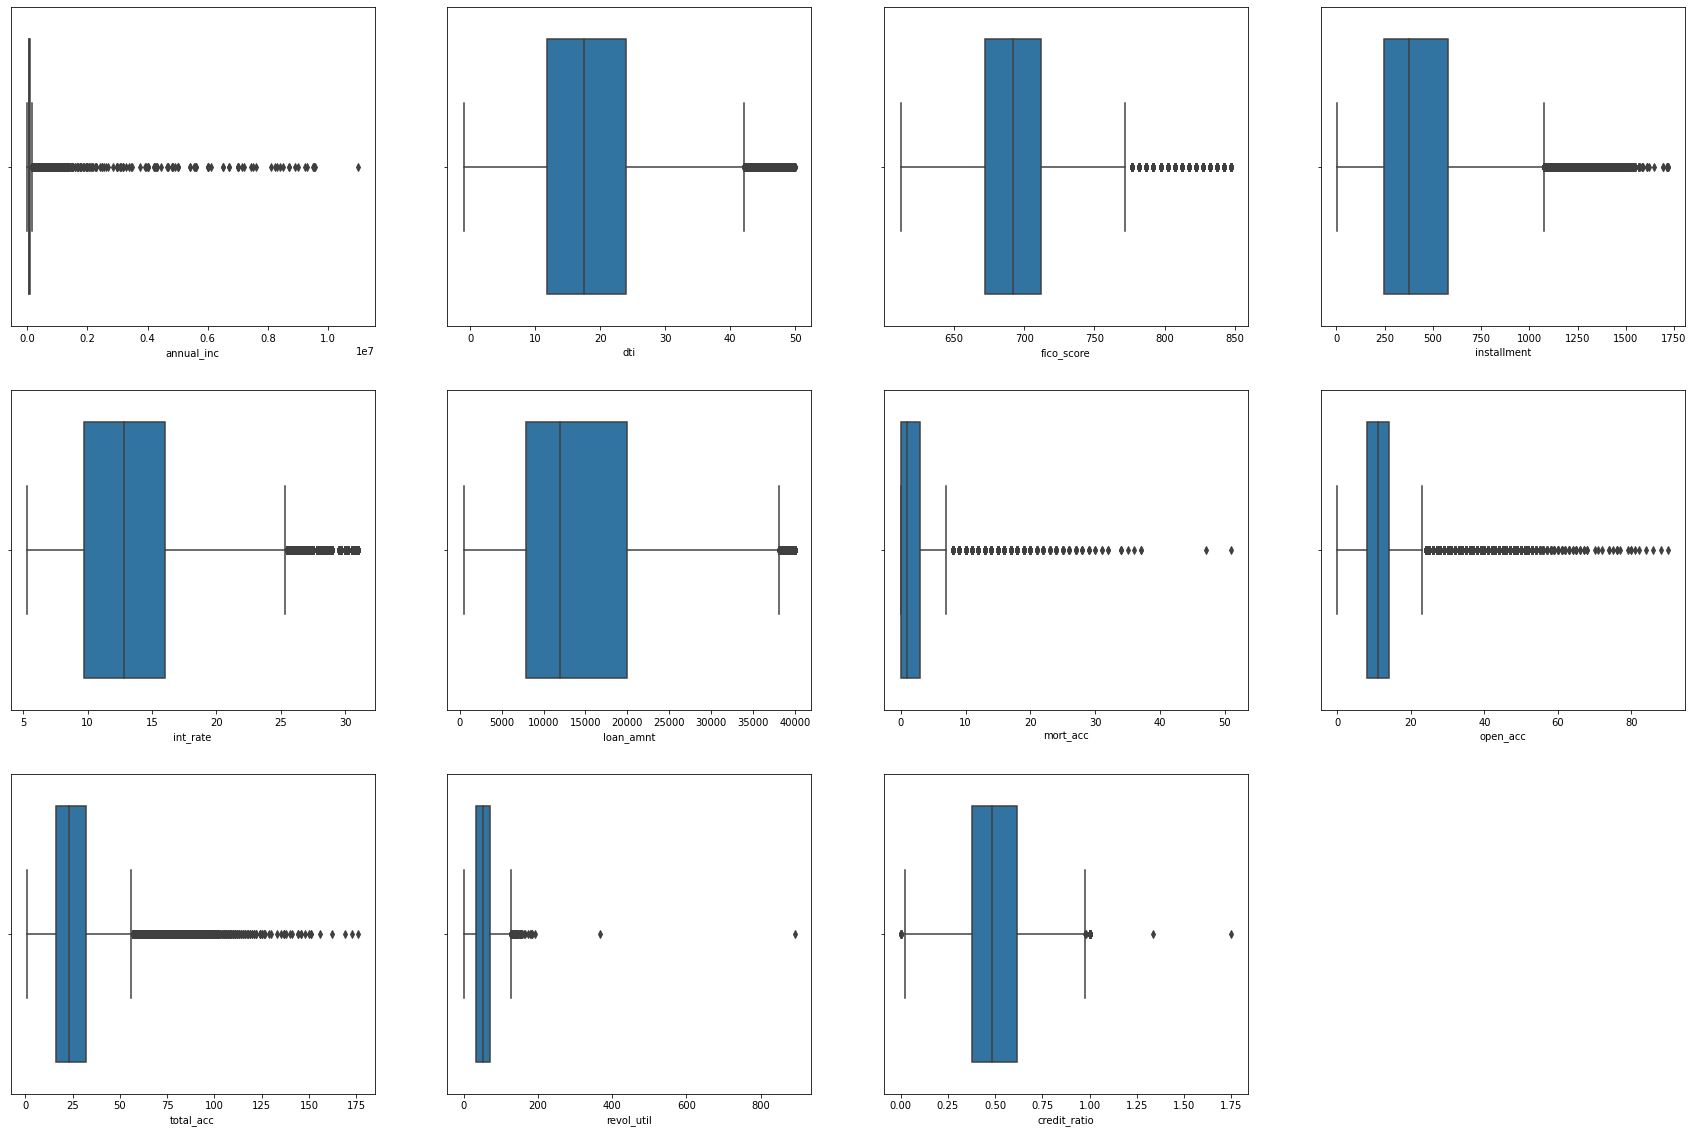

In [ ]:
# plotting boxplot
plt.figure(figsize=(30, 20))
i, j = 3,4
for k in range(1, 12):
    plt.subplot(i, j, k)
    sns.boxplot(ind_df[num_vars[k-1]])

In [ ]:
# capping the some outlier on 1 percentile and 99 percentile
outlier_cols_99_perc=['dti','revol_util']

for cols in ind_df.columns:
    percentiles = ind_df[outlier_cols_99_perc].quantile([0.01, 0.99]).values
    ind_df[outlier_cols_99_perc] = np.clip(ind_df[outlier_cols_99_perc], percentiles[0],percentiles[1])

In [ ]:
# capping installment_ratio with 0.06 and 0.99 percentile value
percentiles = ind_df['installment_ratio'].quantile([0.1, 0.99]).values
ind_df['installment_ratio'] = np.clip(ind_df['installment_ratio'],percentiles[0], percentiles[1])

#  capping installment_ratio with 0.01 and 0.98 percentile value
percentiles = ind_df['credit_ratio'].quantile([0.01, 0.98]).values
ind_df['credit_ratio'] = np.clip(ind_df['credit_ratio'],percentiles[0], percentiles[1])


In [ ]:
# capping the some outlier on 1 percentile and 95 percentile
outlier_cols_95_perc=['loan_amnt','int_rate','installment','annual_inc','fico_score',
                      'mort_acc','total_acc','open_acc']

for cols in ind_df.columns:
    percentiles = ind_df[outlier_cols_95_perc].quantile([0.01, 0.95]).values
    ind_df[outlier_cols_95_perc] = np.clip(ind_df[outlier_cols_95_perc], percentiles[0],percentiles[1])

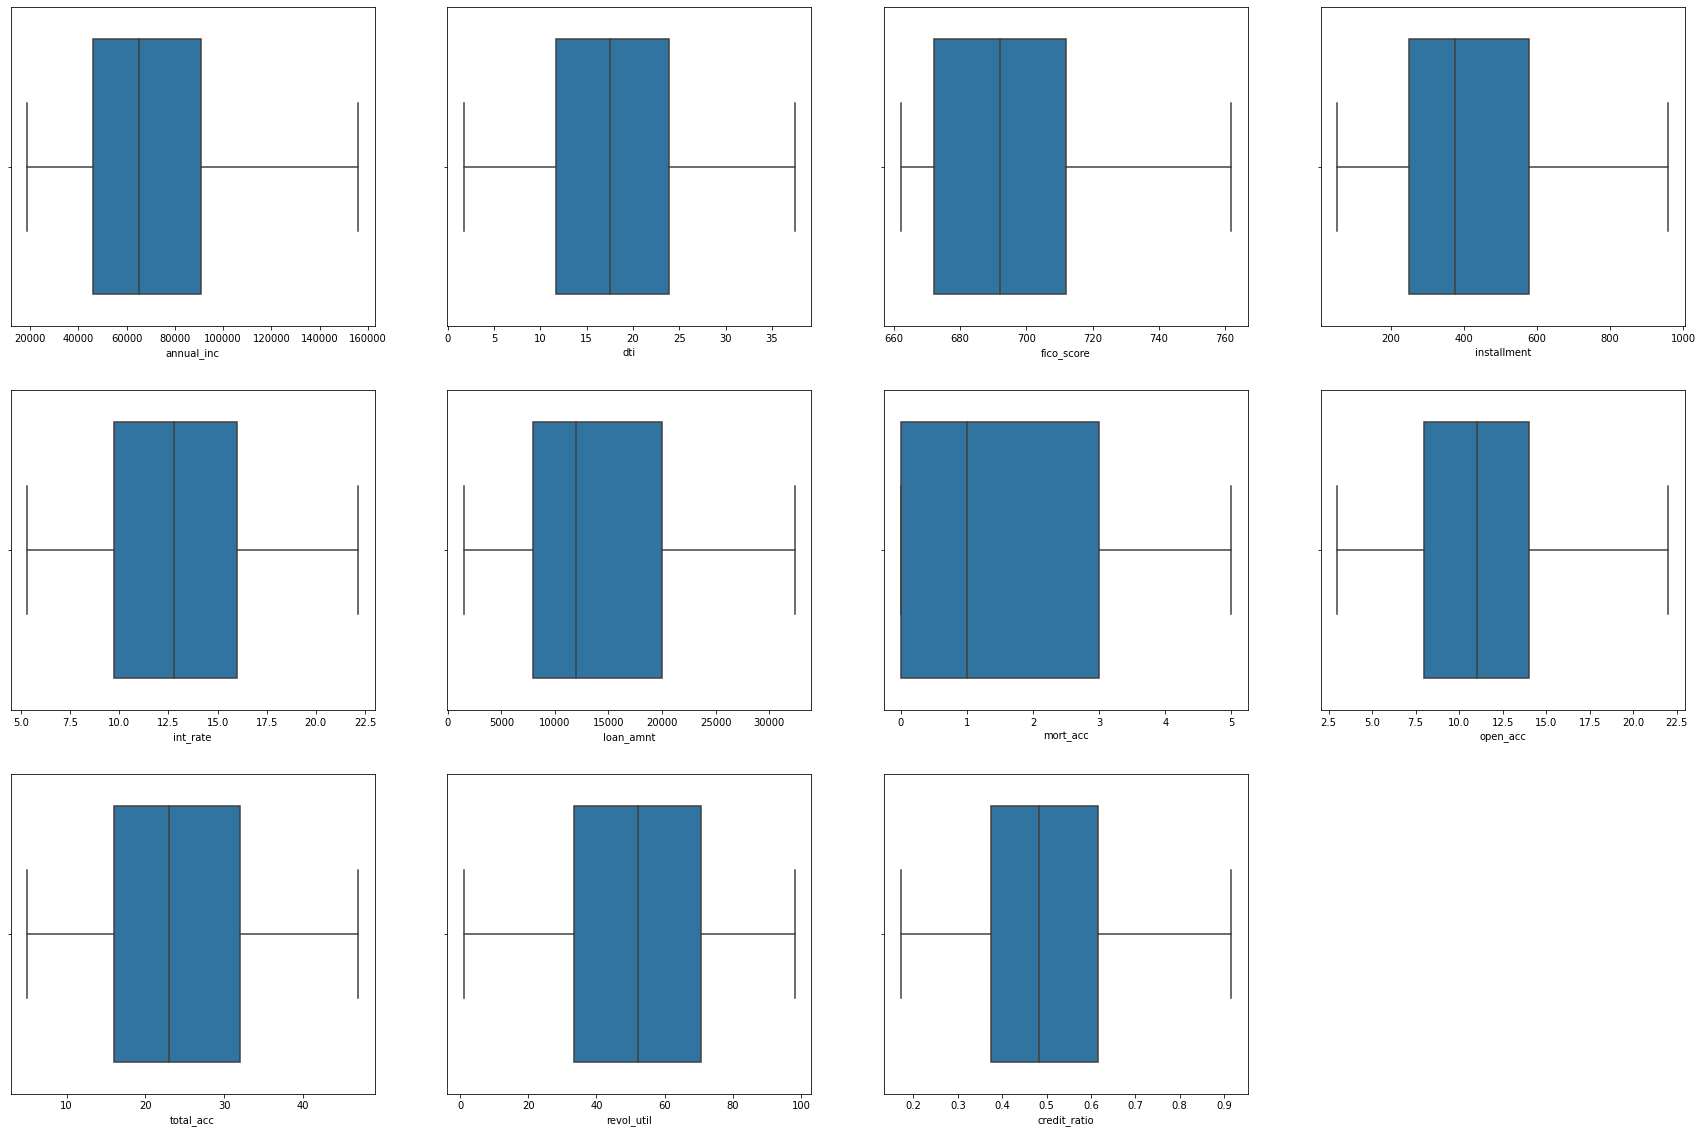

In [ ]:
# plotting boxplot
plt.figure(figsize=(30, 20))
i, j = 3,4
for k in range(1, 12):
    plt.subplot(i, j, k)
    sns.boxplot(ind_df[num_vars[k - 1]])

***Handle outliers for Joint acc type***

In [ ]:
# checking for outlier tendency
jnt_df.kurtosis(axis=0).sort_values(ascending=False)

dti_jnt              184.543619
total_annual_inc      57.616982
open_acc               2.573276
mort_acc               2.262118
total_acc              1.655116
fico_score             0.836995
int_rate               0.298645
credit_ratio          -0.089875
installment           -0.270276
installment_ratio     -0.852184
loan_amnt             -0.882478
revol_util            -0.896686
target                -1.558490
dtype: float64

In [ ]:
# Separating the Numerical column from accepted dataset.
num_varb = list(jnt_df.columns[jnt_df.dtypes == 'float64'])

print(len(num_varb))

12


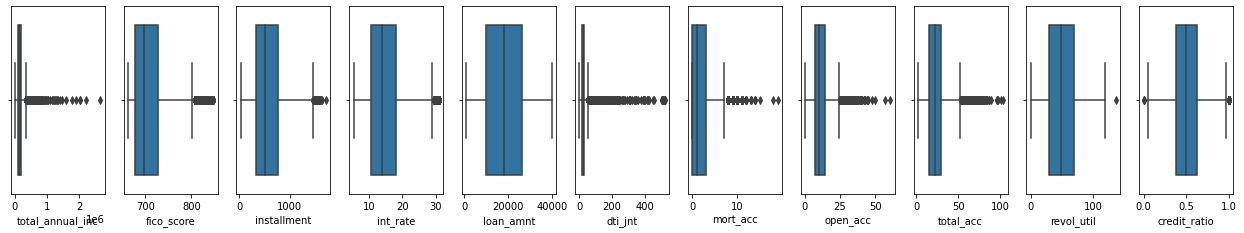

In [ ]:
# plotting boxplot
plt.figure(figsize=(30, 20))
i, j = 5, 15
for k in range(1, 12):
    plt.subplot(i, j, k)
    sns.boxplot(jnt_df[num_varb[k-1]])

In [ ]:
# capping the some outlier on 1 percentile and 99 percentile
outlier_cols_99_perc=['mort_acc','revol_util','installment','credit_ratio']

for cols in jnt_df.columns:
    percentiles = jnt_df[outlier_cols_99_perc].quantile([0.01, 0.99]).values
    jnt_df[outlier_cols_99_perc] = np.clip(jnt_df[outlier_cols_99_perc], percentiles[0],percentiles[1])

In [ ]:
jnt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   total_annual_inc           29584 non-null  float64        
 1   fico_score                 29584 non-null  float64        
 2   home_ownership             29584 non-null  object         
 3   installment                29584 non-null  float64        
 4   int_rate                   29584 non-null  float64        
 5   loan_amnt                  29584 non-null  float64        
 6   earliest_cr_line           29584 non-null  datetime64[ns] 
 7   issue_d                    29584 non-null  datetime64[ns] 
 8   grade                      29584 non-null  object         
 9   sub_grade                  29584 non-null  object         
 10  dti_jnt                    29584 non-null  float64        
 11  mort_acc                   29584 non-null  float64    

In [ ]:
#  capping installment_ratio with 0.01 and 0.98 percentile value
percentiles = jnt_df['credit_ratio'].quantile([0.01, 0.98]).values
jnt_df['credit_ratio'] = np.clip(jnt_df['credit_ratio'],percentiles[0], percentiles[1])


In [ ]:
# capping the some outlier on 1 percentile and 95 percentile
outlier_cols_95_perc=['loan_amnt','dti_jnt','fico_score','total_annual_inc',
                      'total_acc','open_acc','int_rate']

for cols in jnt_df.columns:
    percentiles = jnt_df[outlier_cols_95_perc].quantile([0.01, 0.95]).values
    jnt_df[outlier_cols_95_perc] = np.clip(jnt_df[outlier_cols_95_perc], percentiles[0],percentiles[1])

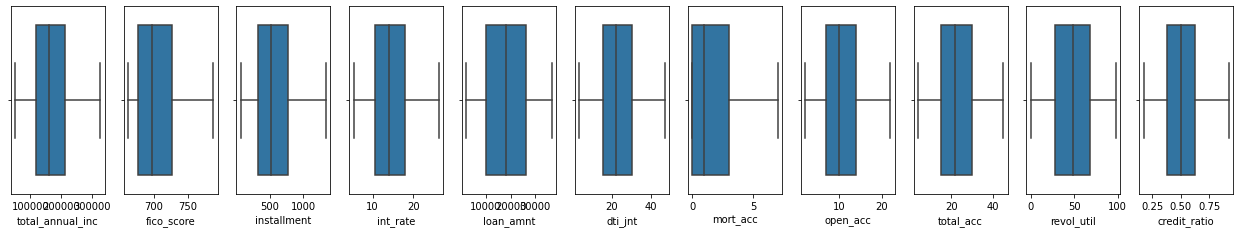

In [ ]:
# plotting boxplot
plt.figure(figsize=(30, 20))
i, j = 5, 15
for k in range(1, 12):
    plt.subplot(i, j, k)
    sns.boxplot(jnt_df[num_varb[k-1]])

***All outliers are handled successfully***

There are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime.

In [ ]:
# converting the date column into number for individual data.
ind_df['issue_d']= pd.to_datetime(ind_df['issue_d']).apply(lambda x: int(x.strftime('%m%Y')))
ind_df['earliest_cr_line']=ind_df['earliest_cr_line'].apply(lambda x: x.strftime('%m%Y'))

In [ ]:
# converting the date column into number for joint data.
jnt_df['issue_d']= pd.to_datetime(jnt_df['issue_d']).apply(lambda x: int(x.strftime('%m%Y')))
jnt_df['earliest_cr_line']=jnt_df['earliest_cr_line'].apply(lambda x: x.strftime('%m%Y'))

# **Label Encoding**

***Encoding for individual data.***

In [ ]:
ind_df.dtypes

annual_inc                     float64
dti                            float64
fico_score                     float64
home_ownership                  object
installment                    float64
int_rate                       float64
loan_amnt                      float64
earliest_cr_line                object
issue_d                          int64
grade                           object
sub_grade                       object
mort_acc                       float64
term                            object
verification_status             object
zip_code                        object
open_acc                       float64
total_acc                      float64
revol_util                     float64
credit_ratio                   float64
installment_ratio              float64
target                           int64
credit_history         timedelta64[ns]
dtype: object

In [ ]:
ind_df['home_ownership'].nunique()


6

In [ ]:
ind_df['home_ownership'].value_counts()

MORTGAGE    662501
RENT        543376
OWN         146346
ANY            311
OTHER          182
NONE            51
Name: home_ownership, dtype: int64

In [ ]:
ind_df['home_ownership']=ind_df['home_ownership'].map({"NONE":0,"OTHER":1,'ANY':2,'OWN':3,'RENT':4,'MORTGAGE':6})

In [ ]:
ind_df['home_ownership'].value_counts()

6    662501
4    543376
3    146346
2       311
1       182
0        51
Name: home_ownership, dtype: int64

In [ ]:
ind_df['verification_status'].nunique()


3

In [ ]:
ind_df['verification_status'].value_counts()

Source Verified    527480
Verified           418173
Not Verified       407114
Name: verification_status, dtype: int64

In [ ]:
ind_df['verification_status']=ind_df['verification_status'].map({"Source Verified":0,"Verified":1,"Not Verified":2})

In [ ]:
# "Fit" is responsible to create dictionaries 
# "Transform" helps to map the variables and convert the categorical variables into numerical variables
# For pre-processing the data

from sklearn.preprocessing import LabelEncoder

cols = ['term','grade','sub_grade']

le=LabelEncoder()

for x in cols:
    ind_df[x]=le.fit_transform(ind_df[x])

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) # This is to check how each variable is getting converted
print('Feature', x)
print('mapping', le_name_mapping)

Feature sub_grade
mapping {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34}


In [ ]:
ind_df['zip_code'].nunique()

946

In [ ]:
ind_df['zip_code'] = ind_df['zip_code'].str[:2]

In [ ]:
ind_df['zip_code'].astype(int)

0          19
1          57
2          17
3          30
4          55
           ..
1352762    77
1352763    90
1352764    86
1352765    28
1352766    33
Name: zip_code, Length: 1352767, dtype: int64

In [ ]:
ind_df['zip_code'].isnull().sum()

0

In [ ]:
# converting the credit history column from categorical to numerical by removing days from the column

ind_df.credit_history=ind_df.credit_history.apply(lambda x: str(x).split(" ",1)[0]).astype(int)


In [ ]:
ind_df.head()

,annual_inc,dti,fico_score,home_ownership,installment,int_rate,loan_amnt,earliest_cr_line,issue_d,grade,sub_grade,mort_acc,term,verification_status,zip_code,open_acc,total_acc,revol_util,credit_ratio,installment_ratio,target,credit_history
0,55000.0,5.91,677.0,6,123.03,13.99,3600.0,082003,122015,2,13,1.0,0,2,19,7.0,13.0,29.7,0.538,0.034,0,4505
1,65000.0,16.06,717.0,6,820.28,11.99,24700.0,121999,122015,2,10,4.0,0,2,57,22.0,38.0,19.2,0.579,0.033,0,5844
2,104433.0,25.37,697.0,6,289.91,22.15,10400.0,061998,122015,5,25,5.0,1,0,17,12.0,35.0,64.5,0.343,0.028,0,6392
3,34000.0,10.20,692.0,4,405.18,13.44,11950.0,101987,122015,2,12,0.0,0,0,30,5.0,6.0,68.4,0.833,0.034,0,10288
4,156000.0,14.67,682.0,6,637.58,9.17,20000.0,061990,122015,1,6,4.0,0,2,55,12.0,27.0,84.5,0.444,0.032,0,9314


***Encoding for joint data.***

In [ ]:
jnt_df.dtypes

total_annual_inc                     float64
fico_score                           float64
home_ownership                        object
installment                          float64
int_rate                             float64
loan_amnt                            float64
earliest_cr_line                      object
issue_d                                int64
grade                                 object
sub_grade                             object
dti_jnt                              float64
mort_acc                             float64
term                                  object
verification_status_joint             object
zip_code                              object
open_acc                             float64
total_acc                            float64
revol_util                           float64
credit_ratio                         float64
installment_ratio                    float64
target                                 int64
credit_history               timedelta64[ns]
dtype: obj

In [ ]:
jnt_df['home_ownership'].value_counts()

MORTGAGE    19641
RENT         7072
OWN          2869
NONE            2
Name: home_ownership, dtype: int64

In [ ]:
jnt_df['home_ownership']=jnt_df['home_ownership'].map({"NONE":0,'OWN':1,'RENT':2,'MORTGAGE':3})

In [ ]:
jnt_df['verification_status_joint'].value_counts()

Not Verified       16727
Source Verified     7504
Verified            5353
Name: verification_status_joint, dtype: int64

In [ ]:
jnt_df['verification_status_joint']=jnt_df['verification_status_joint'].map({"Source Verified":0,"Verified":1,"Not Verified":2})

In [ ]:
# "Fit" is responsible to create dictionaries 
# "Transform" helps to map the variables and convert the categorical variables into numerical variables
# For pre-processing the data

from sklearn.preprocessing import LabelEncoder

cols = ['term','grade','sub_grade']

le=LabelEncoder()

for x in cols:
    jnt_df[x]=le.fit_transform(jnt_df[x])

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) # This is to check how each variable is getting converted
print('Feature', x)
print('mapping', le_name_mapping)

Feature sub_grade
mapping {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34}


In [ ]:
jnt_df['zip_code'].nunique()

848

In [ ]:
jnt_df['zip_code'] = jnt_df['zip_code'].str[:2]

In [ ]:
jnt_df['zip_code'].astype(int)

0        60
1        91
2        77
3        64
4        60
         ..
29579    83
29580    10
29581    72
29582    98
29583     6
Name: zip_code, Length: 29584, dtype: int64

In [ ]:
# converting the credit history column from categorical to numerical by removing days from the column
jnt_df.credit_history=jnt_df.credit_history.apply(lambda x: str(x).split(" ",1)[0]).astype(int)\


In [ ]:
jnt_df.head()

,total_annual_inc,fico_score,home_ownership,installment,int_rate,loan_amnt,earliest_cr_line,issue_d,grade,sub_grade,dti_jnt,mort_acc,term,verification_status_joint,zip_code,open_acc,total_acc,revol_util,credit_ratio,installment_ratio,target,credit_history
0,134000.00,697.0,3,432.66,10.78,20000.0,082000,122015,1,8,12.32,5.0,1,2,60,6.0,18.0,56.2,0.333,0.022,0,5600
1,142000.00,667.0,3,498.15,11.99,15000.0,082004,122015,2,10,16.48,1.0,0,2,91,9.0,16.0,88.3,0.562,0.033,0,4139
2,156749.00,682.0,3,678.37,23.13,24000.0,071998,122015,5,26,30.57,1.0,1,2,77,13.0,22.0,73.1,0.591,0.028,0,6362
3,213000.00,677.0,3,551.50,13.44,24000.0,062001,122015,2,12,22.73,2.0,1,2,64,13.0,24.0,53.3,0.542,0.023,0,5296
4,123872.64,682.0,2,320.70,18.99,8750.0,081998,122015,4,20,31.89,0.0,0,2,60,9.0,12.0,96.5,0.750,0.037,1,6331


# **Train- Test Split for Individual Acc**

In [ ]:
Y = ind_df['target']
X = ind_df.drop('target',axis=1)

In [ ]:
X.shape

(1352767, 21)

In [ ]:
Y.shape

(1352767,)

In [ ]:
Y=Y.astype('int')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[-0.50387911 -1.45615205 -0.69581122 ...  0.20454552  0.66881904
  -0.5200595 ]
 [-0.21848311 -0.23472166  0.71709966 ...  0.44067977  0.41388263
  -0.03190449]
 [ 0.90691893  0.88562483  0.01064422 ... -0.91853203 -0.86079944
   0.16787814]
 ...
 [ 2.37862047 -0.92305484  1.4235551  ...  1.58679481 -1.88054509
  -1.45189238]
 [ 2.20738287 -0.69320932 -1.04903894 ... -0.42322603 -1.88054509
   0.38989936]
 [ 1.06579888  0.03483539 -1.2256528  ... -1.03371947 -1.88054509
   0.13506713]]


***Splitting the data into training and testing.***

In [ ]:
#Split the data into test and train

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=44)

**<h3><font color='blue'>Modelling - Random Forest for indvidual acc**

**Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.**

In [ ]:
# Predicting using the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=25, random_state=10,max_depth=6)

# Fit the model on the data and predict the values

model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [ ]:
# Checking the accuracy and the type 1 and type 2 error with confusion matrix.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[316479   1065]
 [ 86603   1684]]
Classification report: 
              precision    recall  f1-score   support

           0       0.79      1.00      0.88    317544
           1       0.61      0.02      0.04     88287

    accuracy                           0.78    405831
   macro avg       0.70      0.51      0.46    405831
weighted avg       0.75      0.78      0.70    405831

Accuracy of the model:  0.7839790454647377


**The accuracy is 78.3% . And the precision and recall for value 0 for Fully paid is good i.e. 79% and 62%  and  for Default the precision, recall are not that good.This can be because of the target variable imbalance.**

Since our target varible is imbalanced so to fix this lets we are using oversampling method to balance the minority value i.e. here default value to make balance in target column

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE("minority")
X_sm,Y_sm=smote.fit_resample(X_train,Y_train)

In [ ]:
# fitting the model
clf = RandomForestClassifier(n_estimators=25, random_state=10, max_depth=6)
clf.fit(X_sm,Y_sm)
    
# Predict using model
y_pred = clf.predict(X_sm)
    
accuracy_score(Y_sm,y_pred)

0.7125059648449276

In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_sm, y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.745     0.646     0.692    739751
           1      0.688     0.779     0.730    739751

    accuracy                          0.713   1479502
   macro avg      0.716     0.713     0.711   1479502
weighted avg      0.716     0.713     0.711   1479502



**The precision and recall value is improved for target value 1 i.e. Default from 61% to 68% and accuracy dropped from 78.3% to 71% but it is acceptable.**

**Validating the model on test dataset**

In [ ]:
# predicting the values from test data
y_test_pred = clf.predict(X_test)

In [ ]:
# checking the accuracy for test data set
accuracy_score(Y_test,y_test_pred)

0.645709667324576

**accuracy for test dataset is 64 which is almost close to train dataset i.e. 71%**

In [ ]:
# confusion metrics for test dataset
confusion = metrics.confusion_matrix(Y_test, y_test_pred )
confusion

array([[205477, 112067],
       [ 31715,  56572]])

In [ ]:
# classification report for test dataset
print(metrics.classification_report(Y_test, y_test_pred,digits=3))

              precision    recall  f1-score   support

           0      0.866     0.647     0.741    317544
           1      0.335     0.641     0.440     88287

    accuracy                          0.646    405831
   macro avg      0.601     0.644     0.591    405831
weighted avg      0.751     0.646     0.675    405831



# **Train- Test Split for Joint Account**

In [ ]:
y_j = jnt_df['target']
x_j = jnt_df.drop('target',axis=1)

In [ ]:
x_j.shape

(29584, 21)

In [ ]:
y_j.shape

(29584,)

In [ ]:
y_j=y_j.astype('int')

In [ ]:
scaler.fit(x_j)

x_j = scaler.transform(x_j)
print(x_j)

[[-0.51957057 -0.23678042  0.65315817 ... -1.03022355 -1.6699117
  -0.14026631]
 [-0.40347539 -1.09171566  0.65315817 ...  0.29277685  0.49537837
  -0.65238113]
 [-0.18943943 -0.66424804  0.65315817 ...  0.46031838 -0.48884439
   0.1268326 ]
 ...
 [ 0.27858376 -0.23678042  0.65315817 ... -0.18096128 -1.2762226
  -0.18267965]
 [ 1.07673809 -1.09171566  0.65315817 ... -1.0822192  -1.2762226
   0.0626868 ]
 [-0.02616607  0.90313324  0.65315817 ... -0.75291342 -1.86675625
  -0.17216394]]


**Splitting the data into training and testing for Joint Account.**

In [ ]:
x_j_train, x_j_test, y_j_train, y_j_test = train_test_split(x_j, y_j, test_size=0.3,
                                                    random_state=44)

**<h3><font color='green'>Modelling - Random Forest for Joint acc**

In [ ]:
# Predicting using the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=25, random_state=10,max_depth=6)

# Fit the model on the data and predict the values

model_RandomForest.fit(x_j_train,y_j_train)

y_j_pred =model_RandomForest.predict(x_j_test)

In [ ]:
# Checking the accuracy and the type 1 and type 2 error with confusion matrix.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_j_test,y_j_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_j_test,y_j_pred))

accuracy_score(y_j_test,y_j_pred)

[[5410  434]
 [2440  592]]
Classification report: 
              precision    recall  f1-score   support

           0       0.69      0.93      0.79      5844
           1       0.58      0.20      0.29      3032

    accuracy                           0.68      8876
   macro avg       0.63      0.56      0.54      8876
weighted avg       0.65      0.68      0.62      8876



0.6762054979720595

**The accuracy for the Joint account type is 67.6% which is not doing so well,**
**and here also the precision and recall is not good for the default class.**

**Since our target varible is imbalance so to fix this lets use oversampling method to balance the minority value i.e. here default value to make balance in target column.**

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE("minority")
X_j_sm,Y_j_sm = smote.fit_resample(x_j_train,y_j_train)

In [ ]:
# fitting the model
clf_rf = RandomForestClassifier(n_estimators=25, random_state=10, max_depth=6)
clf_rf.fit(X_j_sm,Y_j_sm)
    
# Predict using model
y_j_pred = clf_rf.predict(X_j_sm)
    
accuracy_score(Y_j_sm,y_j_pred)

0.6929180135174846

In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_j_sm, y_j_pred,digits=3))

              precision    recall  f1-score   support

           0      0.713     0.646     0.678     13612
           1      0.676     0.740     0.707     13612

    accuracy                          0.693     27224
   macro avg      0.695     0.693     0.692     27224
weighted avg      0.695     0.693     0.692     27224



**The precision and recall value is improved for target value 1 i.e. Default. Now precision improved from 58% to 67% and recall improved from 20% to 70%.**

**Validating the model on test dataset**

In [ ]:
# predicting the values from test data
y_j_test_pred = clf_rf.predict(x_j_test)

In [ ]:
# checking the accuracy for test data set
accuracy_score(y_j_test,y_j_test_pred)

0.6243803515096891

**Accuracy for test dataset is 62% which is close to train dataset i.e. 69%**

In [ ]:
# confusion metrics for test dataset
confusion = metrics.confusion_matrix(y_j_test, y_j_test_pred )
confusion

array([[3718, 2126],
       [1208, 1824]])

In [ ]:
# classification report for test dataset
print(metrics.classification_report(y_j_test, y_j_test_pred,digits=3))

              precision    recall  f1-score   support

           0      0.755     0.636     0.690      5844
           1      0.462     0.602     0.522      3032

    accuracy                          0.624      8876
   macro avg      0.608     0.619     0.606      8876
weighted avg      0.655     0.624     0.633      8876



# **Conclusion**

***We have successfully built an machine learning algorithm to predict preventing investing on the bad loans and also have balanced the target variable .***